In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
insample = pd.read_csv(
    os.path.join(
        r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
        r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE insample_results.csv'
    )
)

outofsample = pd.read_csv(
    os.path.join(
        r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE',
        r'2024_10_07 17-55-55 Deep Neural Network 3oosRMSE outofsample_results.csv'
    )
)

In [63]:
maturities = outofsample['days_to_maturity'].unique().tolist()
barrier_type_names = outofsample['barrier_type_name'].unique().tolist()
oos_byt = outofsample.groupby(by='days_to_maturity')

RMSE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        RMSE.loc[t,i] = np.sqrt(np.average(subset['outofsample_error'][subset['barrier_type_name']==i]**2))
print(f"\nRMSE:\n{RMSE}\n")
MAE = pd.DataFrame(
    np.zeros((len(maturities),len(barrier_type_names)),dtype=float),
    index = maturities,
    columns = barrier_type_names
)
for t in maturities:
    subset = oos_byt.get_group(t)
    for i in barrier_type_names:
        MAE.loc[t,i] = np.average(np.abs(subset['outofsample_error'][subset['barrier_type_name']==i]))
print(f"\nMAE:\n{MAE}\n")


RMSE:
      DownOut    DownIn     UpOut      UpIn
60   3.420546  3.036111  3.103050  1.928077
90   3.179918  2.553306  2.745966  2.956064
180  3.608048  2.932081  3.002232  2.531611
360  4.116093  3.474472  3.334166  3.491895
540  3.241166  3.421667  3.636143  3.934537
720  4.253463  4.654416  3.689636  4.757972


MAE:
      DownOut    DownIn     UpOut      UpIn
60   2.499641  2.045915  2.479627  1.334053
90   2.498592  1.813985  1.993175  1.801767
180  2.507377  2.259798  2.347951  1.733322
360  2.768824  2.386369  2.442526  2.596700
540  2.460775  2.422215  2.730204  3.035637
720  3.318341  3.597693  2.856043  3.685858



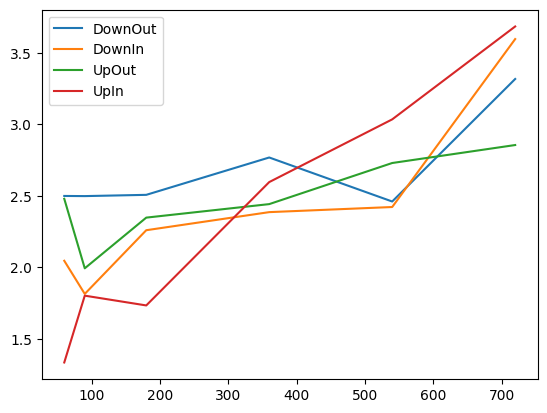

In [64]:
plt.figure()
plt.plot(MAE.loc[:, 'DownOut'], label='DownOut')
plt.plot(MAE.loc[:, 'DownIn'], label='DownIn')
plt.plot(MAE.loc[:, 'UpOut'], label='UpOut')
plt.plot(MAE.loc[:, 'UpIn'], label='UpIn')
plt.legend()
plt.show()
plt.close()

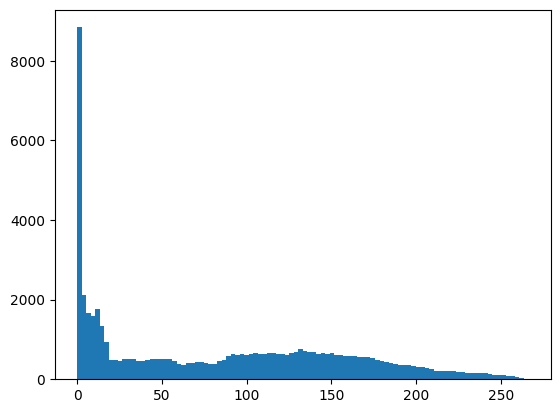

<Figure size 640x480 with 0 Axes>

In [65]:
plt.figure()
plt.hist(
    oos_byt.get_group(720)['observed_price'],
    bins=100
)
plt.show()
plt.clf()